### Random Forest

- Random Forest
- Visuals

In [26]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import csv

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
#import warnings
#warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
np.random.seed(42)

### Gridsearch with Random Forest

#### Import the Data

In [2]:
features_df = pd.read_csv('../data/tvec_df.csv')

In [3]:
features_df.head()

,11,12,15,2018,39a,40,air,air force,amp,apollo,...,time,today,twitter,vab,vehicle,video,view,year,years,subreddit
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
1,0.0,0.0,0.0,0.868537,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,spacex
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.387832,0.0,0.0,0.0,0.0,0.476247,0.0,spacex
4,0.0,0.0,0.0,0.000000,0.0,0.307456,0.0,0.0,0.0,0.0,...,0.304733,0.0,0.267847,0.0,0.0,0.0,0.0,0.000000,0.0,spacex


In [4]:
features_df['subreddit'].value_counts()

nasa      1227
spacex    1221
Name: subreddit, dtype: int64

#### Setup X and y

In [5]:
features_df['y'] = [1 if i == 'spacex' else 0 for i in features_df['subreddit']]

In [6]:
X = features_df.drop(['subreddit', 'y'], axis=1)
y = features_df['y']

#### Train / Test / Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

#### Instantiate Model and Setup Parameter

In [8]:
rf = RandomForestClassifier()
cross_val_score(rf, X_train, y_train).mean()

0.8921575564008908

In [9]:
params = {
    'n_estimators': [90, 100, 110],
    'criterion': ['gini', 'entropy']
}

In [10]:
gs = GridSearchCV(rf, param_grid=params)

In [11]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [90, 100, 110], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
gs.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [13]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
gs.score(X_train, y_train)

0.9509803921568627

In [15]:
gs.score(X_test, y_test)

0.9264705882352942

In [16]:
gs.grid_scores_

/Users/nelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.89651, std: 0.00320, params: {'criterion': 'gini', 'n_estimators': 90},
 mean: 0.89379, std: 0.00274, params: {'criterion': 'gini', 'n_estimators': 100},
 mean: 0.89651, std: 0.00507, params: {'criterion': 'gini', 'n_estimators': 110},
 mean: 0.89597, std: 0.00200, params: {'criterion': 'entropy', 'n_estimators': 90},
 mean: 0.89760, std: 0.00417, params: {'criterion': 'entropy', 'n_estimators': 100},
 mean: 0.89597, std: 0.00417, params: {'criterion': 'entropy', 'n_estimators': 110}]

In [17]:
pred_gs = gs.predict(X_test)

In [18]:
con_mat = confusion_matrix(y_test, pred_gs)
con_mat

array([[296,  11],
       [ 34, 271]])

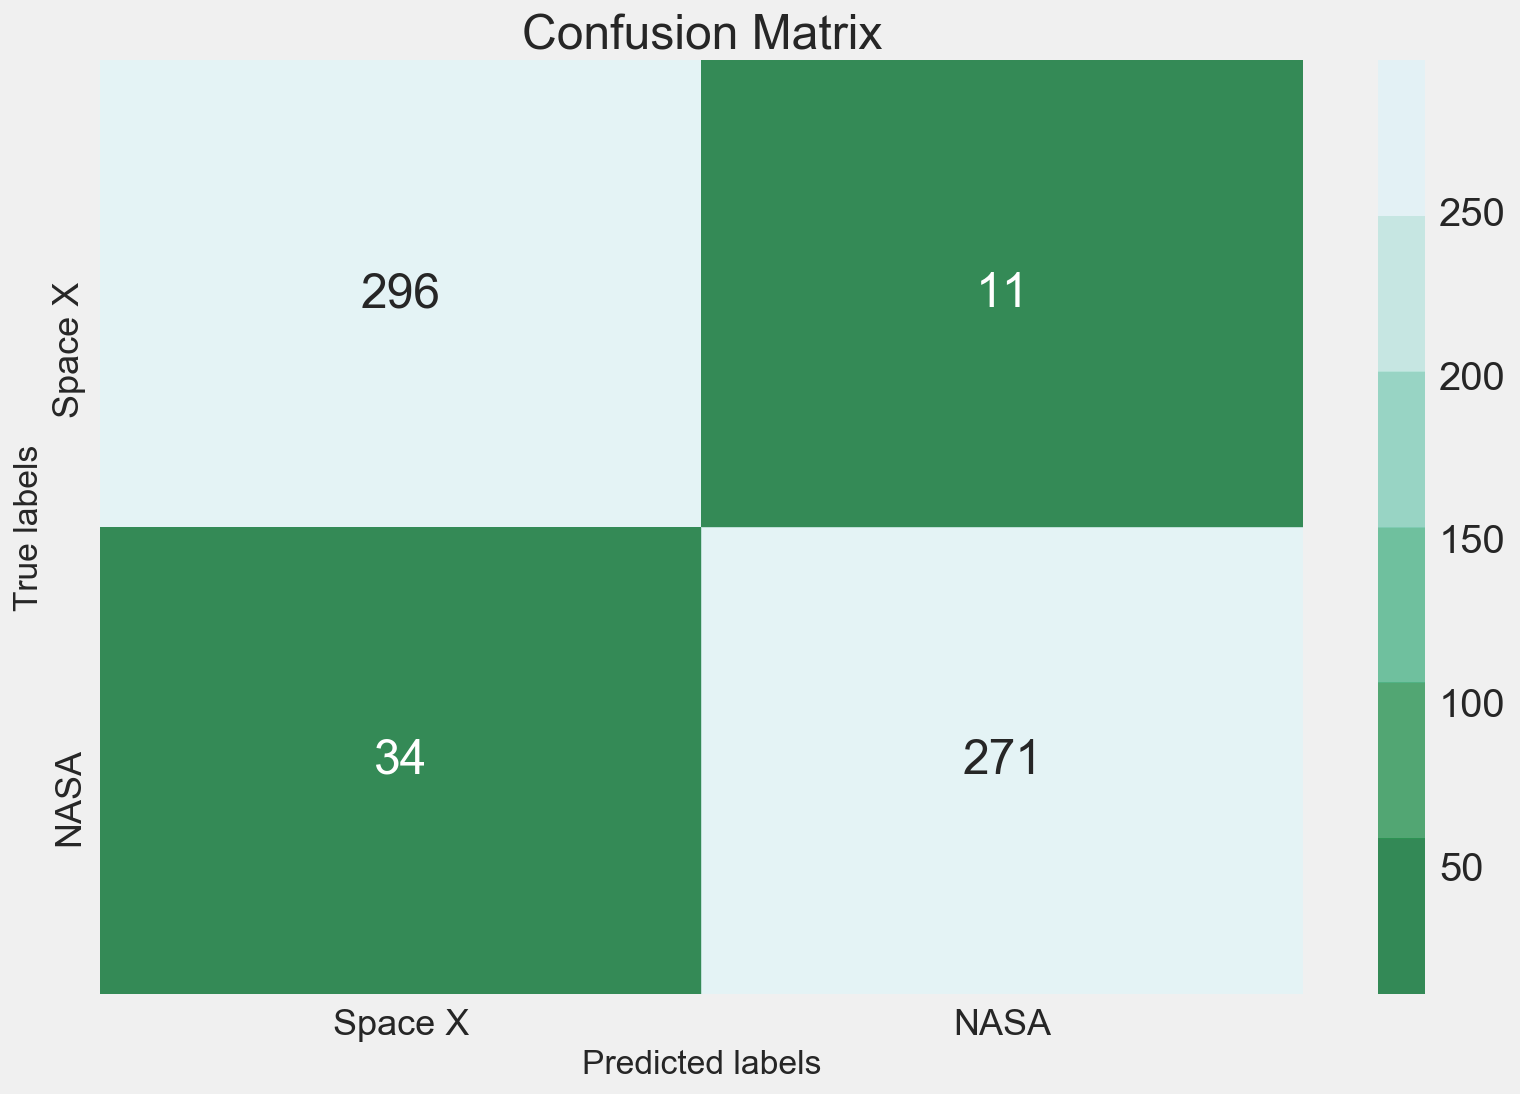

In [27]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.set(font_scale=2)
plt.xticks(fontsize=18); plt.yticks(fontsize=18)
cmap = sns.color_palette("BuGn_r")
sns.heatmap(con_mat, annot=True, cmap=cmap, fmt='g', alpha=.8);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Space X', 'NASA']); 
ax.yaxis.set_ticklabels(['Space X', 'NASA']);